# Define an SMA crossover Strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
sma_s = 46
sma_l = 137

In [5]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [6]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [7]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.103047,1.102654
2020-06-25,1.125087,1.103905,1.102737
2020-06-26,1.122208,1.104801,1.102788


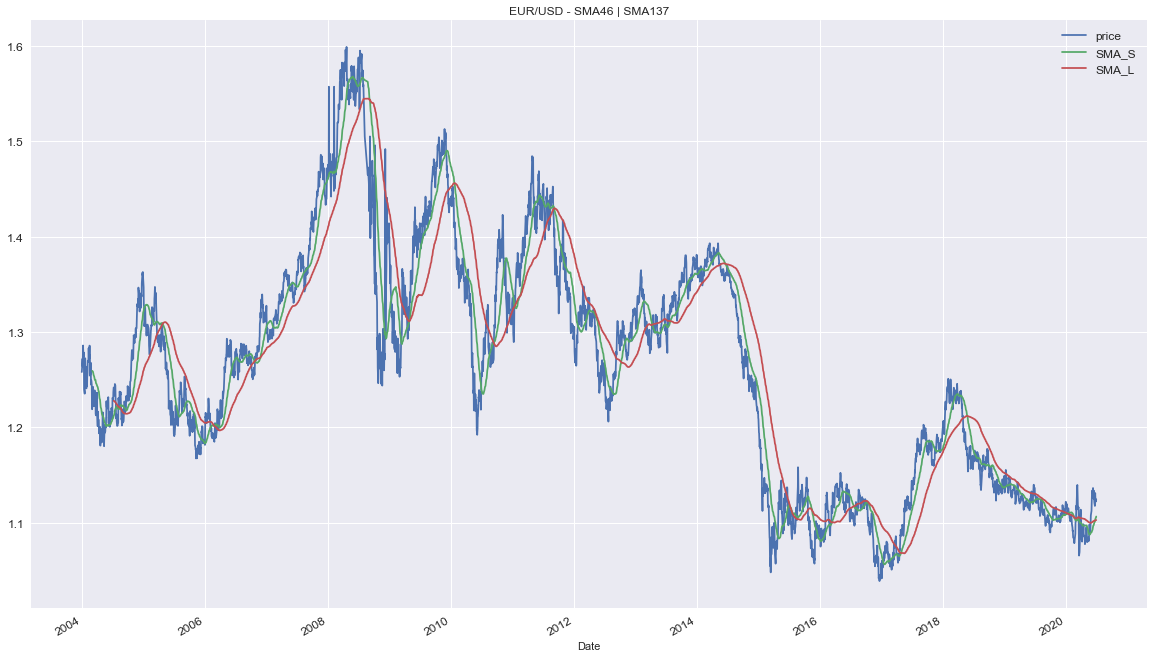

In [8]:
data.plot(figsize = (20, 12), title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [9]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)

In [10]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


<AxesSubplot:title={'center':'EUR/USD - SMA46 | SMA137'}, xlabel='Date'>

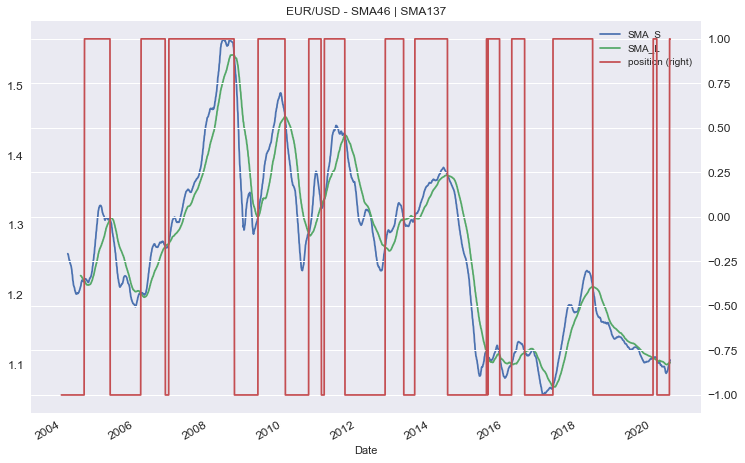

In [11]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize=(12,8), fontsize=12, secondary_y="position", 
                                                 title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))

<AxesSubplot:title={'center':'EUR/USD - SMA46 | SMA137'}, xlabel='Date'>

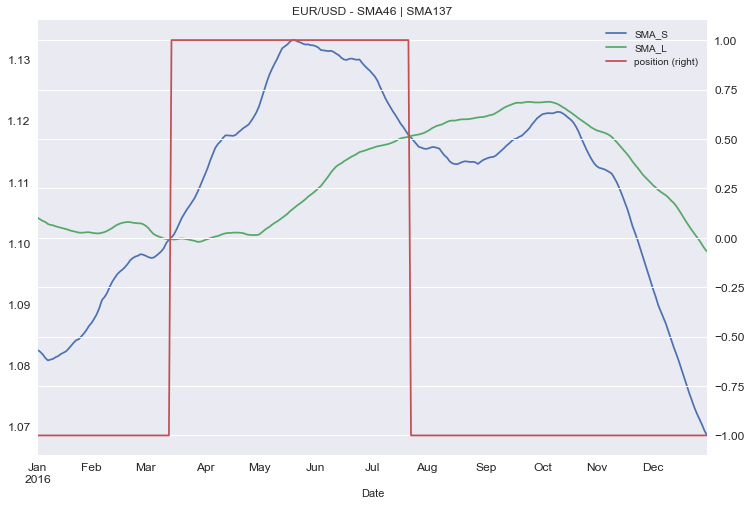

In [12]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize=(12,8), fontsize=12, secondary_y="position", 
                                                 title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))

## Vectorized Strategy Backtesting

In [13]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


In [14]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [15]:
data["strategy"] = data.position.shift(1)*data["returns"]

In [16]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,-1,NaN,NaN
2004-01-02,1.258194,NaN,NaN,-1,0.000000,-0.000000
2004-01-05,1.268698,NaN,NaN,-1,0.008313,-0.008313
2004-01-06,1.272103,NaN,NaN,-1,0.002681,-0.002681
2004-01-07,1.264095,NaN,NaN,-1,-0.006315,0.006315
...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562


In [17]:
data.dropna(inplace=True)

In [18]:
data[["returns", "strategy"]].sum() # absolute performance

returns    -0.097170
strategy    0.924976
dtype: float64

In [19]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     0.907402
strategy    2.521808
dtype: float64

In [20]:
data[["returns", "strategy"]].mean() * 252 # annualised return

returns    -0.005916
strategy    0.056317
dtype: float64

In [21]:
data[["returns", "strategy"]].std() * np.sqrt(252)

returns     0.120405
strategy    0.120353
dtype: float64

In [22]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [23]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-07-09,1.241897,1.212185,1.227891,-1,0.001935,-0.001935,1.001937,0.998066
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,1.001055,0.998946
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.995005,1.005020
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.999195,1.000806
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.996862,1.003148
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.912657,2.536414
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.907698,2.522631
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.905375,2.516177


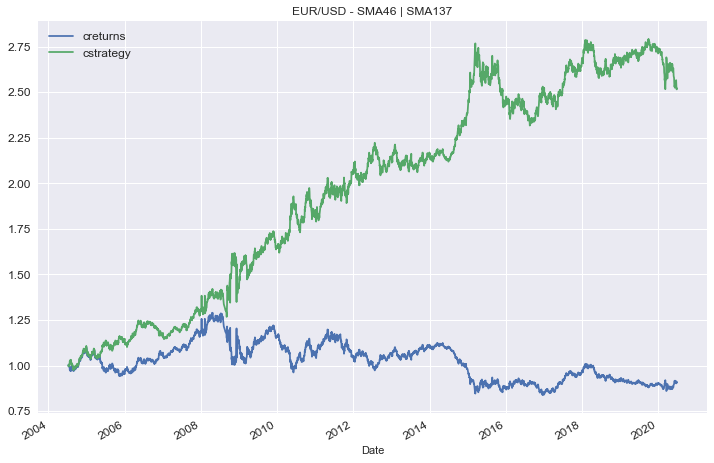

In [24]:
data[["creturns", "cstrategy"]].plot(figsize=(12,8), title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [25]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

1.6144065565705576

## Finding the optimal SMA Strategy

In [26]:
df = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col = "Date")

In [27]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [28]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1)*data["returns"]
    data.dropna(inplace=True)
    
    return data[["returns", "strategy"]].sum().apply(np.exp)#[-1]

In [29]:
run_strategy((50,200))

returns     0.915826
strategy    1.283500
dtype: float64

In [30]:
run_strategy((10,50))

returns     0.919492
strategy    0.987000
dtype: float64

In [31]:
run_strategy((22, 252))

returns     0.83984
strategy    1.14928
dtype: float64

In [32]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1)*data["returns"]
    data.dropna(inplace=True)
    
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [33]:
from scipy.optimize import brute

In [34]:
brute(run_strategy, ((10,50,1),(100,252,1)))

array([ 46., 137.])

In [35]:
run_strategy((46, 137))

-2.5266939897810787